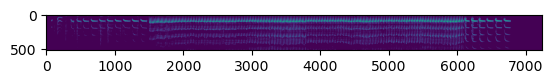

In [16]:
import numpy as np
import matplotlib.pyplot as plt

f = "/Users/benburress-irving/Downloads/gardnerlab_rotationproject/labeled_song_dataset/train/llb3_0010_2018_04_23_15_03_45_segment_0.npz" 

f = np.load(f, allow_pickle=True)

s = f['s']
plt.imshow(s)


In [4]:
print(f['song'].shape)

print(f['song'][:1000])


(7242,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [5]:
print(f['s'].shape)

print(f['s'][:196,:100])

(513, 7242)
[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


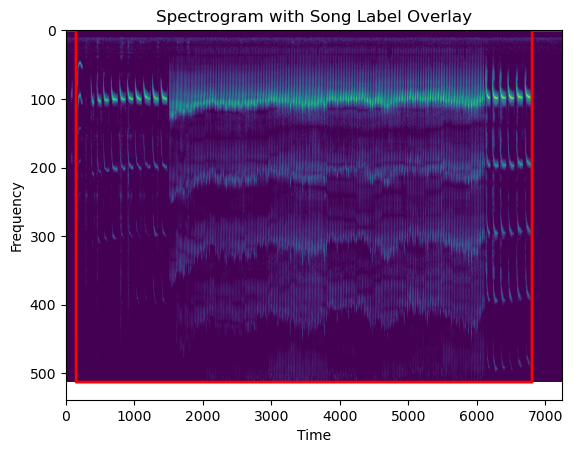

In [6]:
# Plot the spectrogram
plt.imshow(s, aspect='auto')

# Create an overlay for the song array
plt.plot(f['song'] * s.shape[0], color='red', linewidth=2)  # Scaled to match the height of the spectrogram

# Add titles and labels
plt.title("Spectrogram with Song Label Overlay")
plt.xlabel("Time")
plt.ylabel("Frequency")

# Show the plot
plt.show()

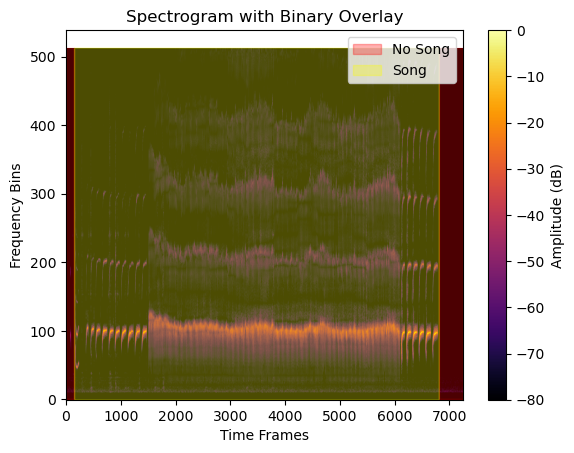

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the spectrogram with inverted frequency axis and enhanced contrast
plt.imshow(f['s'], aspect='auto', cmap='inferno', vmin=-80, vmax=0, origin='lower')

# Add titles and labels
plt.title("Spectrogram with Binary Overlay")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")

# Overlay the binary data
time_steps = np.arange(f['song'].shape[0])  # Create an array representing time steps

# Plot the red areas where f['song'] is 0
plt.fill_between(time_steps, 0, f['s'].shape[0], where=f['song']==0, color='red', alpha=0.3, label='No Song')

# Plot the yellow areas where f['song'] is 1
plt.fill_between(time_steps, 0, f['s'].shape[0], where=f['song']==1, color='yellow', alpha=0.3, label='Song')

# Add a colorbar to represent dB levels
plt.colorbar(label="Amplitude (dB)")

# Add a legend to explain the overlay
plt.legend(loc='upper right')

# Show the plot
plt.show()

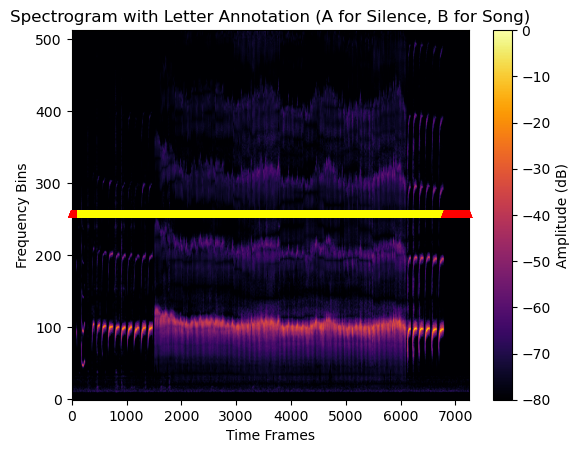

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the spectrogram with inverted frequency axis and enhanced contrast
plt.imshow(f['s'], aspect='auto', cmap='inferno', vmin=-80, vmax=0, origin='lower')

# Add titles and labels
plt.title("Spectrogram with Letter Annotation (A for Silence, B for Song)")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")

# Add letter annotations ('A' for 0, 'B' for 1)
time_steps = np.arange(f['song'].shape[0])  # Create an array representing time steps

# Loop through each time step and place a letter based on the value in f['song']
for t in time_steps:
    if f['song'][t] == 0:
        plt.text(t, f['s'].shape[0] // 2, 'A', color='red', fontsize=8, ha='center', va='center')  # 'A' for silence
    else:
        plt.text(t, f['s'].shape[0] // 2, 'B', color='yellow', fontsize=8, ha='center', va='center')  # 'B' for song

# Add a colorbar to represent dB levels
plt.colorbar(label="Amplitude (dB)")

# Show the plot
plt.show()

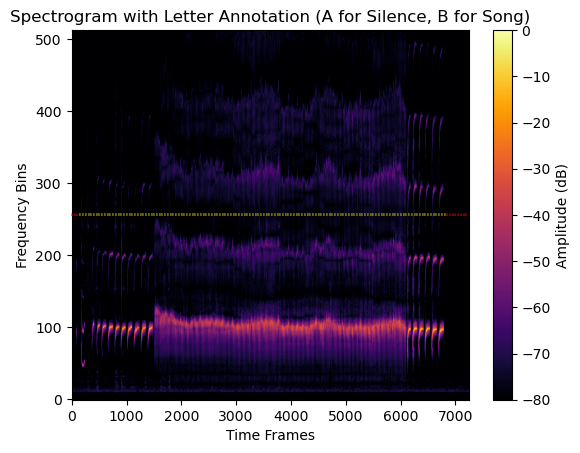

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set an interval to reduce the number of annotations
interval = 50  # Adjust this value to control spacing (e.g., every 50 time frames)

# Plot the spectrogram with inverted frequency axis and enhanced contrast
plt.imshow(f['s'], aspect='auto', cmap='inferno', vmin=-80, vmax=0, origin='lower')

# Add titles and labels
plt.title("Spectrogram with Letter Annotation (A for Silence, B for Song)")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")

# Add letter annotations ('A' for 0, 'B' for 1) at regular intervals
time_steps = np.arange(f['song'].shape[0])  # Create an array representing time steps

# Loop through each time step, but skip some frames based on the interval
for t in range(0, len(time_steps), interval):
    if f['song'][t] == 0:
        plt.text(t, f['s'].shape[0] // 2, 'A', color='red', fontsize=2, ha='center', va='center')  # 'A' for silence
    else:
        plt.text(t, f['s'].shape[0] // 2, 'B', color='yellow', fontsize=2, ha='center', va='center')  # 'B' for song

# Add a colorbar to represent dB levels
plt.colorbar(label="Amplitude (dB)")

# Show the plot
plt.show()

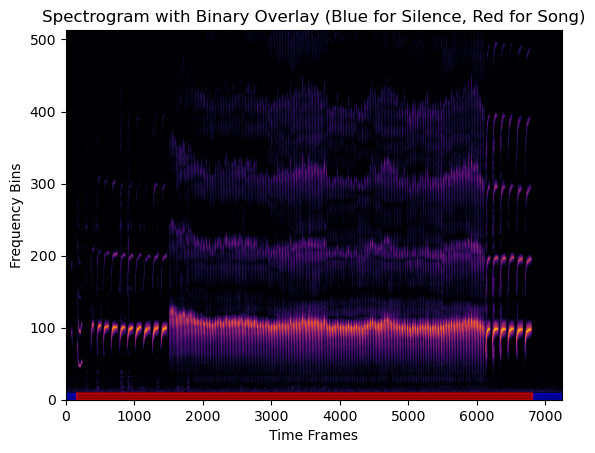

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the spectrogram with inverted frequency axis and enhanced contrast
plt.imshow(f['s'], aspect='auto', cmap='inferno', vmin=-80, vmax=0, origin='lower')

# Add titles and labels
plt.title("Spectrogram with Binary Overlay (Blue for Silence, Red for Song)")
plt.xlabel("Time Frames")
plt.ylabel("Frequency Bins")

# Add the binary overlay as a bar at the bottom of the graph
time_steps = np.arange(f['song'].shape[0])  # Create an array representing time steps

# Plot the blue bar for '0' (silence)
plt.fill_between(time_steps, 0, 10, where=f['song'] == 0, color='blue', alpha=0.6, label='Silence')

# Plot the red bar for '1' (song)
plt.fill_between(time_steps, 0, 10, where=f['song'] == 1, color='red', alpha=0.6, label='Song')

# Adjust y-axis limits to show the bar at the bottom clearly
plt.ylim([0, f['s'].shape[0]])

# Show the plot
plt.show()